## Code to plot matcups on a real-world map with interactive spectra plots

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

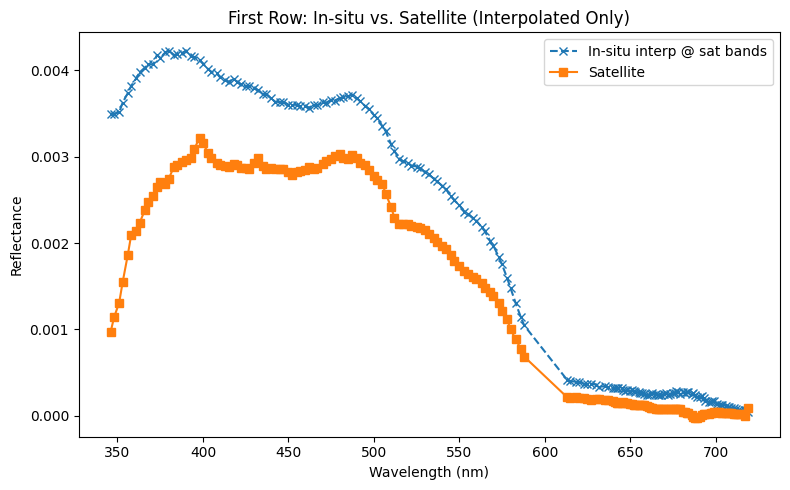

In [7]:

# 0) Define your path
path = "/home/jovyan/Hackweek/Project/SeaPACE/matchups_all.csv"

# 1) Read the CSV and grab the first matchup
df    = pd.read_csv(path)
first = df.iloc[0]

# 2) Get satellite wavelengths & values
sat_cols = [c for c in df.columns if c.startswith('sat_rrs')]
sat_wl   = np.array([float(c.replace('sat_rrs','')) for c in sat_cols])
sat_val  = first[sat_cols].astype(float).values

# 3) Get in-situ wavelengths & values (numeric column names)
insitu_cols = []
for c in df.columns:
    try:
        float(c)
        insitu_cols.append(c)
    except ValueError:
        continue

insitu_wl  = np.array([float(c) for c in insitu_cols])
insitu_val = first[insitu_cols].astype(float).values

# 4) Sort in-situ spectrum for interpolation
sort_idx          = np.argsort(insitu_wl)
insitu_wl_sorted  = insitu_wl[sort_idx]
insitu_val_sorted = insitu_val[sort_idx]

# 5) Interpolate in-situ at the satellite bands
insitu_interp = np.interp(sat_wl, insitu_wl_sorted, insitu_val_sorted)

# 6) Plot only the interpolated in-situ and the satellite data
plt.figure(figsize=(8,5))
plt.plot(sat_wl, insitu_interp, 'x--', label='In-situ interp @ sat bands')
plt.plot(sat_wl, sat_val,       's-', label='Satellite')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('First Row: In-situ vs. Satellite (Interpolated Only)')
plt.legend()
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd

# — Step 1: Load your matchup CSV and prepare the time string —

# 1.1) Read in the CSV (adjust path as needed)
df = pd.read_csv(path)

# 1.2) Parse the in-situ field_datetime into a nice string for tooltips
df['DateTime_str'] = (
    pd.to_datetime(df['field_datetime'], utc=True)
      .dt.strftime('%Y-%m-%d %H:%M:%S')
)

# 1.3) (Optional) Quick check
print(df[['field_datetime','DateTime_str']].head())


        field_datetime         DateTime_str
0  2024-09-06 21:11:00  2024-09-06 21:11:00
1  2024-09-12 21:05:00  2024-09-12 21:05:00
2  2024-09-17 20:24:00  2024-09-17 20:24:00
3  2024-09-18 20:48:00  2024-09-18 20:48:00
4  2024-09-19 19:39:00  2024-09-19 19:39:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
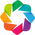

:Layout
   .Overlay.I    :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [merc_x,merc_y]   (DateTime_str,field_latitude,field_longitude)
   .DynamicMap.I :DynamicMap   []
      :Curve   [Wavelength]   (Reflectance)

In [37]:
import pandas as pd, math
import holoviews as hv
from holoviews.element.tiles import CartoLight
from holoviews.streams import Tap

hv.extension('bokeh')

# — 1) your DataFrame must already be loaded into `df`,
#    and have at least these columns:
#      'field_datetime', 'field_latitude','field_longitude',
#      plus your in-situ and satellite spectral bands.

# make a human‐readable time string
df['DateTime_str'] = pd.to_datetime(df['field_datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')

# — 2) convert lon/lat → Web Mercator
def lonlat_to_mercator(lon, lat):
    k = 6378137.0
    x = lon * (math.pi/180.0) * k
    y = math.log(math.tan((90 + lat) * math.pi/360.0)) * k
    return x, y

df['merc_x'], df['merc_y'] = zip(*[
    lonlat_to_mercator(lon, lat)
    for lon, lat in zip(df['field_longitude'], df['field_latitude'])
])

# — 3) build your Points layer *with* the 'tap' tool enabled
points = hv.Points(
    df,
    kdims=['merc_x','merc_y'],
    vdims=['DateTime_str','field_latitude','field_longitude']
).opts(
    size=6, color='blue',
    tools=['hover','tap','wheel_zoom','pan'],     # <— must include 'tap'
    active_tools=['wheel_zoom'],
    hover_tooltips=[
        ('Time', '@DateTime_str'),
        ('Lat',  '@field_latitude'),
        ('Lon',  '@field_longitude')
    ]
)

tap = Tap(source=points)

# — 4) callback: given x, y returns a spectrum curve
def spectrum_for(x, y):
    if x is None or y is None:
        return hv.Curve([], 'Wavelength','Reflectance')\
                 .opts(title="Click a point to see its spectrum")
    # find the nearest point in mercator space
    dist2 = (df['merc_x'] - x)**2 + (df['merc_y'] - y)**2
    idx   = dist2.idxmin()
    row   = df.loc[idx]

    # --- now extract your spectral columns from `row` ---
    # for example, say your in-situ bands are columns [ 'wl_400', 'wl_412', ... ]
    # and satellite bands are columns like [ 'sat_rrs_410', 'sat_rrs_443', ... ].
    in_situ_cols  = [c for c in df.columns if c.startswith('wl_')]
    sat_cols      = [c for c in df.columns if c.startswith('sat_rrs_')]

    wl_insitu = [float(c.split('_')[1]) for c in in_situ_cols]
    val_insitu= row[in_situ_cols].values.astype(float)

    wl_sat    = [float(c.split('_')[-1]) for c in sat_cols]
    val_sat   = row[sat_cols].values.astype(float)

    c1 = hv.Curve((wl_insitu,  val_insitu),  'Wavelength','Reflectance')\
           .opts(color='blue',  legend_label='In-situ')
    c2 = hv.Curve((wl_sat,     val_sat),     'Wavelength','Reflectance')\
           .opts(color='red',   legend_label='Satellite')

    return (c1 * c2).opts(
        width=500, height=350,
        title=f"Spectrum @ {row['DateTime_str']}",
        legend_position='top_left'
    )

spectrum_dmap = hv.DynamicMap(spectrum_for, streams=[tap])

# — 5) compose map + spectrum
tiles       = CartoLight().opts(width=800, height=600, xaxis=None, yaxis=None)
map_overlay = tiles * points

layout = (map_overlay + spectrum_dmap).cols(1)

# disable shared axes so the lower plot auto‐scales
layout.opts(shared_axes=False)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
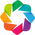

:Layout
   .Overlay.I    :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [merc_x,merc_y]   (DateTime_str,field_latitude,field_longitude)
   .DynamicMap.I :DynamicMap   []
      :Curve   [Wavelength]   (Reflectance)

In [53]:
import pandas as pd, re, math
import holoviews as hv
from holoviews.streams import Tap
from holoviews.element.tiles import CartoLight
from holoviews import opts

hv.extension('bokeh')

# — 1) LOAD & PREPARE DATA ————————————————————————————————

hv.extension('bokeh')

# 1) load your matchup CSV
df = pd.read_csv(path)
df['DateTime_str'] = (
    pd.to_datetime(df['field_datetime'])
      .dt.strftime('%Y-%m-%d %H:%M:%S')
)

# 2) mercator conversion
def lonlat_to_mercator(lon, lat):
    k = 6378137.0
    x = lon * (math.pi/180.0) * k
    y = math.log(math.tan((90 + lat) * math.pi/360.0)) * k
    return x, y

df['merc_x'], df['merc_y'] = zip(*[
    lonlat_to_mercator(lon, lat)
    for lon, lat in zip(df['field_longitude'], df['field_latitude'])
])

# 3) identify bands
meta_cols = {
    'field_datetime','field_latitude','field_longitude',
    'sat_datetime','sat_cv','sat_latitude','sat_longitude','sat_pixel_valid',
    'DateTime_str','merc_x','merc_y'
}
sat_cols = sorted(c for c in df.columns if c.startswith('sat_rrs'))

insitu_cols = sorted(
    [c for c in df.columns
     if c not in meta_cols
     and c not in sat_cols
     and re.match(r'^\d+(\.\d+)?$', c)
    ],
    key=lambda s: float(s)
)


# — 2) BUILD THE MAP LAYER ——————————————————————————————
points = hv.Points(
    df,
    kdims=['merc_x','merc_y'],
    vdims=['DateTime_str','field_latitude','field_longitude']
).opts(
    size=8, color='blue',
    tools=['tap','wheel_zoom','pan'],    # enable tap
    active_tools=['wheel_zoom'],
    hover_tooltips=[
        ('Time', '@DateTime_str'),
        ('Lat',  '@field_latitude'),
        ('Lon',  '@field_longitude')
    ]
)

tiles = CartoLight().opts(
    width=900, height=600,
    xaxis=None, yaxis=None
)

tap = Tap(source=points)  # stream that gives us x,y on tap

# — 3) CALLBACK TO PLOT SPECTRUM ————————————————————————————
def make_spectrum(x, y):
    # no tap yet?
    if x is None or y is None:
        return hv.Curve([], 'Wavelength','Reflectance')\
                 .opts(title="Tap on a point to see its spectrum",
                       width=500, height=350)
    # find nearest point in mercator space
    dist2 = (df['merc_x']-x)**2 + (df['merc_y']-y)**2
    idx   = dist2.idxmin()
    row   = df.loc[idx]

    # pull out the in‐situ bands & values
    ins_wl  = [float(c) for c in insitu_cols]
    ins_val = [row[c]     for c in insitu_cols]

    # pull out the satellite bands & values
    sat_wl  = [float(re.search(r'(\d+(\.\d+)?)$',c).group(1)) for c in sat_cols]
    sat_val = [row[c]                                         for c in sat_cols]

    c1 = hv.Curve((ins_wl,  ins_val),  'Wavelength','Reflectance')\
           .opts(color='blue',  legend_label='In‐situ')
    c2 = hv.Curve((sat_wl,  sat_val),  'Wavelength','Reflectance')\
           .opts(color='red',   legend_label='Satellite', marker='o')

    return (c1 * c2).opts(
        title=f"Spectrum @ {row['DateTime_str']}",
        width=500, height=350,
        legend_position='top_left'
    )

spectrum_dmap = hv.DynamicMap(make_spectrum, streams=[tap])

# — 4) LAYOUT ——————————————————————————————————————————
map_panel = (tiles * points)
layout    = (map_panel + spectrum_dmap).cols(1)

# disable shared axes (we really have two different plots)
layout.opts(opts.Layout(shared_axes=False))
